In [3]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc
import datetime
import numpy as np

# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = 'vpay-asdmi.public.21203d2a181c.database.windows.net,3342' 
database = 'VENPAY-BI' 
username = 'nandaa' 
password = 'Timileyin1998'  

engine = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = engine.cursor()

### CoffeeCappTransByMerchantInstantKpis

In [5]:

query = """
SELECT [PK_CoffeeCappTransByMerchantInstantKpisId]
            ,[ReferenceDate]
            ,[EK_MerchantId]
            ,[MerchantName]
            ,[TotalTransactionsCounter]
            ,[CompletedTransactionsCounter]
            ,[ValidationErrorsCounter]
            ,[ConnectionErrorsCounter]
            ,[RejectionErrorsCounter]
            ,[SystemErrorsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByMerchantInstantKpis]
"""

df_coffeeCappTransMerchant = pd.read_sql(query, engine)
df_coffeeCappTransMerchant

In [ ]:

query = """
        SELECT MerchantName, SUM(TotalTransactionsCounter) AS TotalTrans, SUM(CompletedTransactionsCounter) AS TotalCompTrans  
        FROM CoffeeCappTransByMerchantInstantKpis
        GROUP BY MerchantName
"""

df_coffeeCappTransMerchantOne = pd.read_sql(query, engine)
df_coffeeCappTransMerchantOne 

,MerchantName,TotalTrans,TotalCompTrans
0,Vaportris,21293,17887
1,Mpay Your Voice,0,0
2,Vendomat,82,72
3,Gruppo Illiria,42275,34733
4,Romagna Vending,0,0
...,...,...,...
70,BASSANO DISTRIBUTORI SRL,0,0
71,Automatic Service,0,0
72,WORLD MATIC,0,0
73,Vat,0,0


In [ ]:
query = """
SELECT [PK_CoffeeCappTransByMerchantInstantKpisId]
            ,[ReferenceDate]
            ,[EK_MerchantId]
            ,[MerchantName]
            ,[TotalTransactionsCounter]
            ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByMerchantInstantKpis]
WHERE MerchantName = 'Your Best Break'	
"""

df_coffeeCappTransBestBreak = pd.read_sql(query, engine)
df_coffeeCappTransBestBreak

,PK_CoffeeCappTransByMerchantInstantKpisId,ReferenceDate,EK_MerchantId,MerchantName,TotalTransactionsCounter,CompletedTransactionsCounter
0,5,2022-11-30 13:55:00,7,Your Best Break,1089,915
1,59,2022-11-30 14:00:00,7,Your Best Break,1204,919
2,113,2022-11-30 14:05:00,7,Your Best Break,1177,924
3,167,2022-11-30 14:10:00,7,Your Best Break,1175,994
4,221,2022-11-30 14:15:00,7,Your Best Break,1111,911
...,...,...,...,...,...,...
60771,3850022,2023-06-26 16:00:00,7,Your Best Break,647,481
60772,3850097,2023-06-26 16:05:00,7,Your Best Break,619,461
60773,3850172,2023-06-26 16:10:00,7,Your Best Break,556,403
60774,3850247,2023-06-26 16:15:00,7,Your Best Break,532,365


Text(0, 0.5, 'TotalTransactionsCounter')

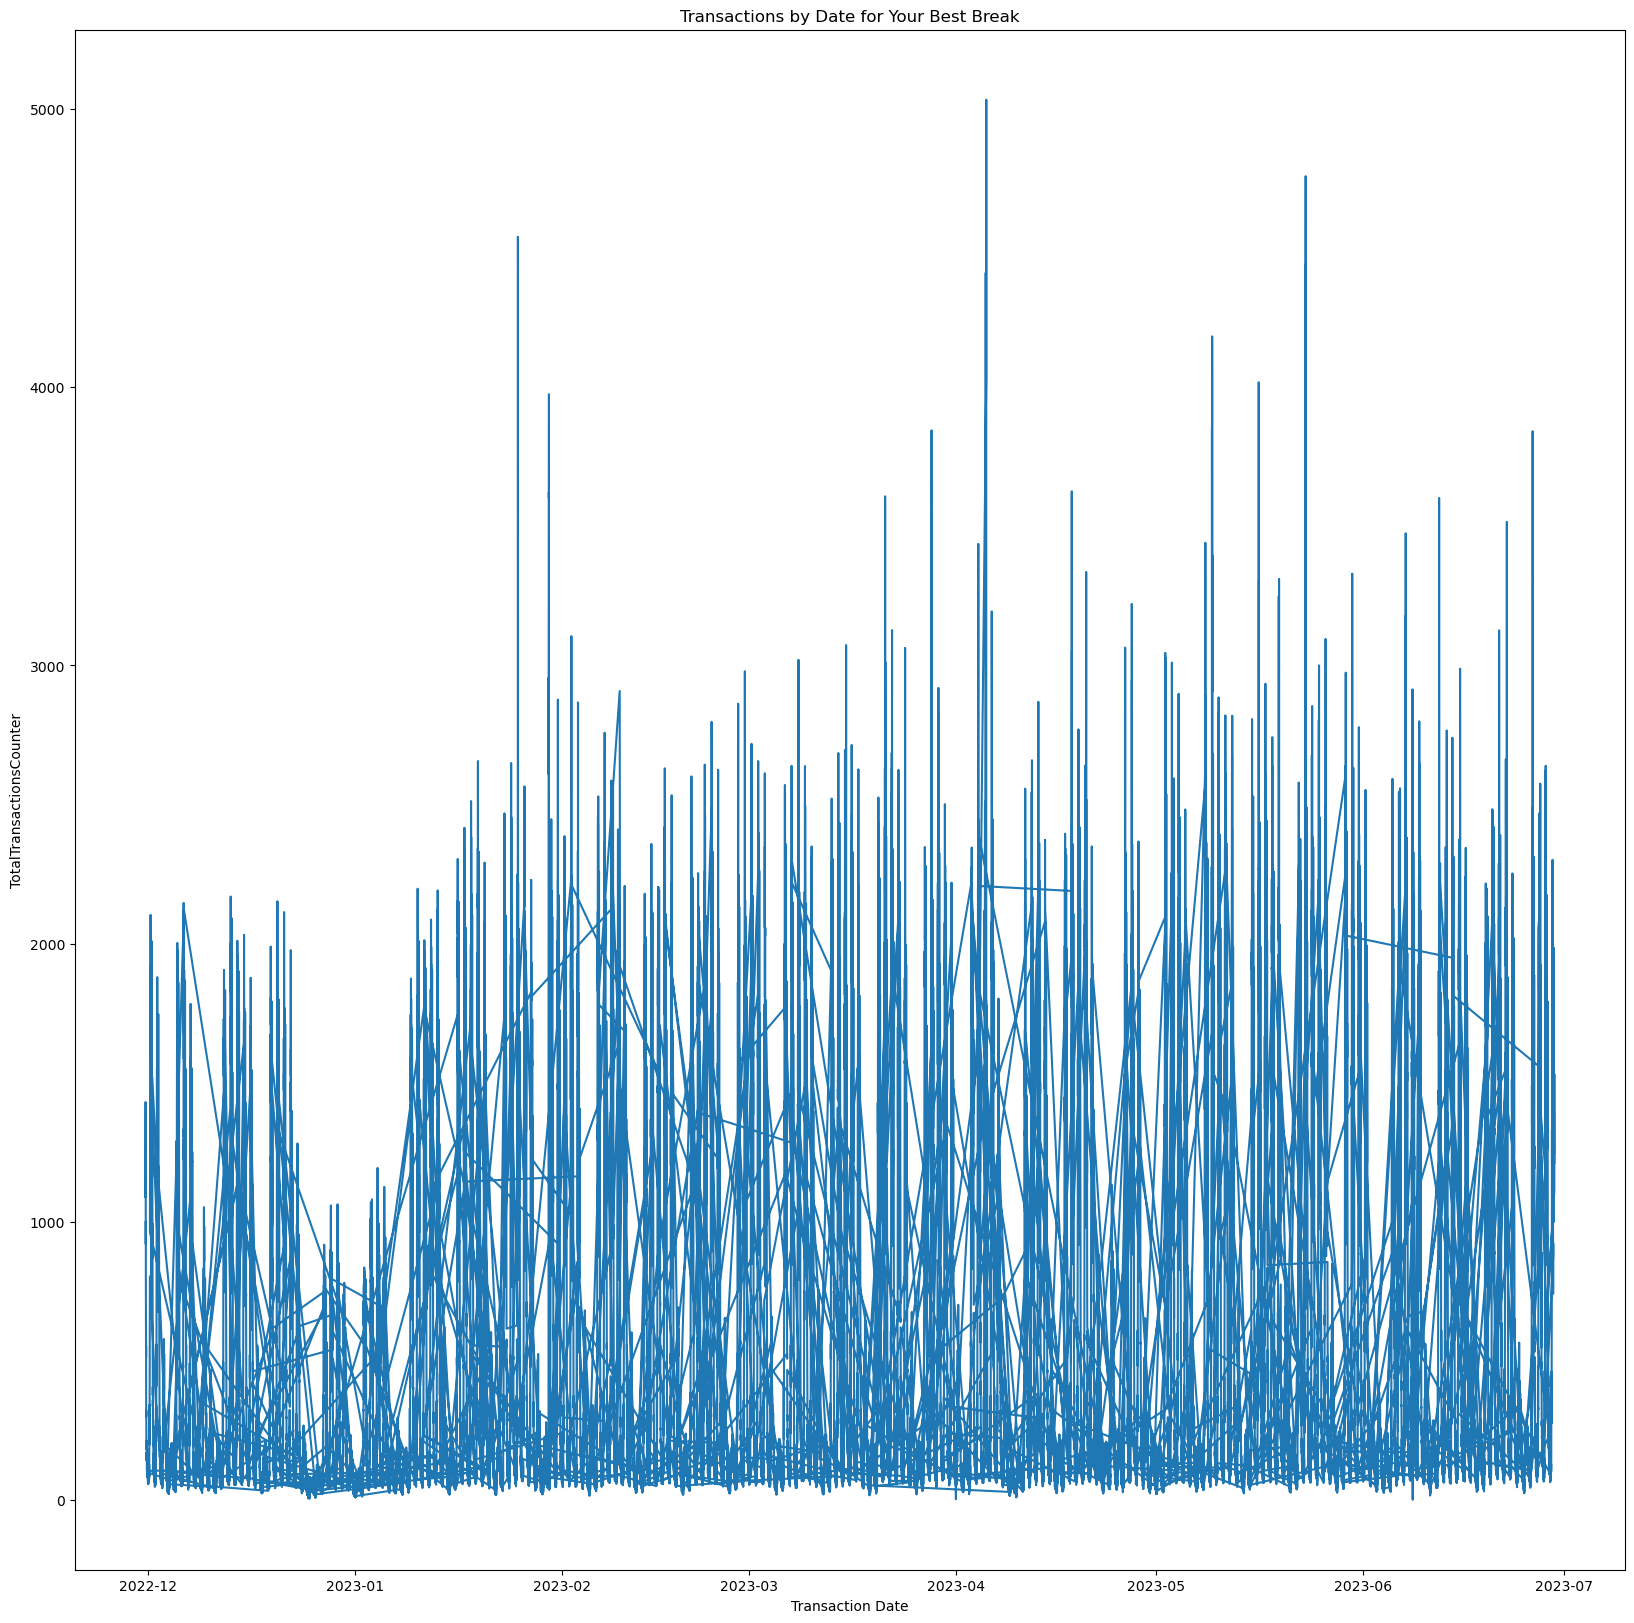

In [ ]:
# Plotting the timeseries graph of given dataset
plt.figure(figsize=(20, 20))
plt.plot(df_coffeeCappTransBestBreak['ReferenceDate'], df_coffeeCappTransBestBreak['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for Your Best Break')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')


<Axes: >

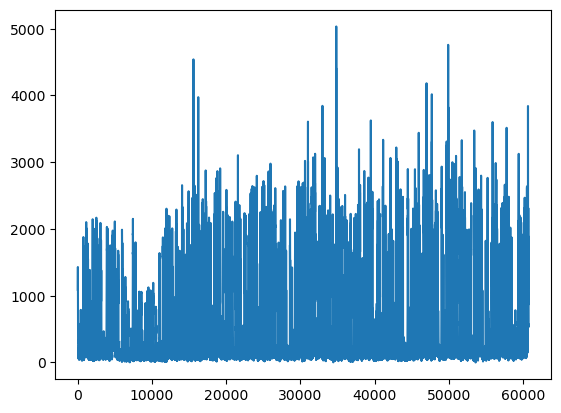

In [ ]:
df_coffeeCappTransBestBreak['TotalTransactionsCounter'].plot()

In [ ]:
query = """
SELECT [PK_CoffeeCappTransByMerchantInstantKpisId]
            ,[ReferenceDate]
            ,[EK_MerchantId]
            ,[MerchantName]
            ,[TotalTransactionsCounter]
            ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByMerchantInstantKpis]
WHERE MerchantName = 'Vending Company'	
"""

df_coffeeCappTransVend = pd.read_sql(query, engine)
df_coffeeCappTransVend

,PK_CoffeeCappTransByMerchantInstantKpisId,ReferenceDate,EK_MerchantId,MerchantName,TotalTransactionsCounter,CompletedTransactionsCounter
0,19819,2022-12-01 20:30:00,1,Vending Company,0,0
1,19873,2022-12-01 20:35:00,1,Vending Company,0,0
2,19927,2022-12-01 20:40:00,1,Vending Company,0,0
3,19981,2022-12-01 20:45:00,1,Vending Company,0,0
4,20035,2022-12-01 20:50:00,1,Vending Company,0,0
...,...,...,...,...,...,...
60771,3830893,2023-06-25 18:45:00,1,Vending Company,0,0
60772,3830968,2023-06-25 18:50:00,1,Vending Company,0,0
60773,3831043,2023-06-25 18:55:00,1,Vending Company,0,0
60774,3831118,2023-06-25 19:00:00,1,Vending Company,0,0


Text(0, 0.5, 'TotalTransactionsCounter')

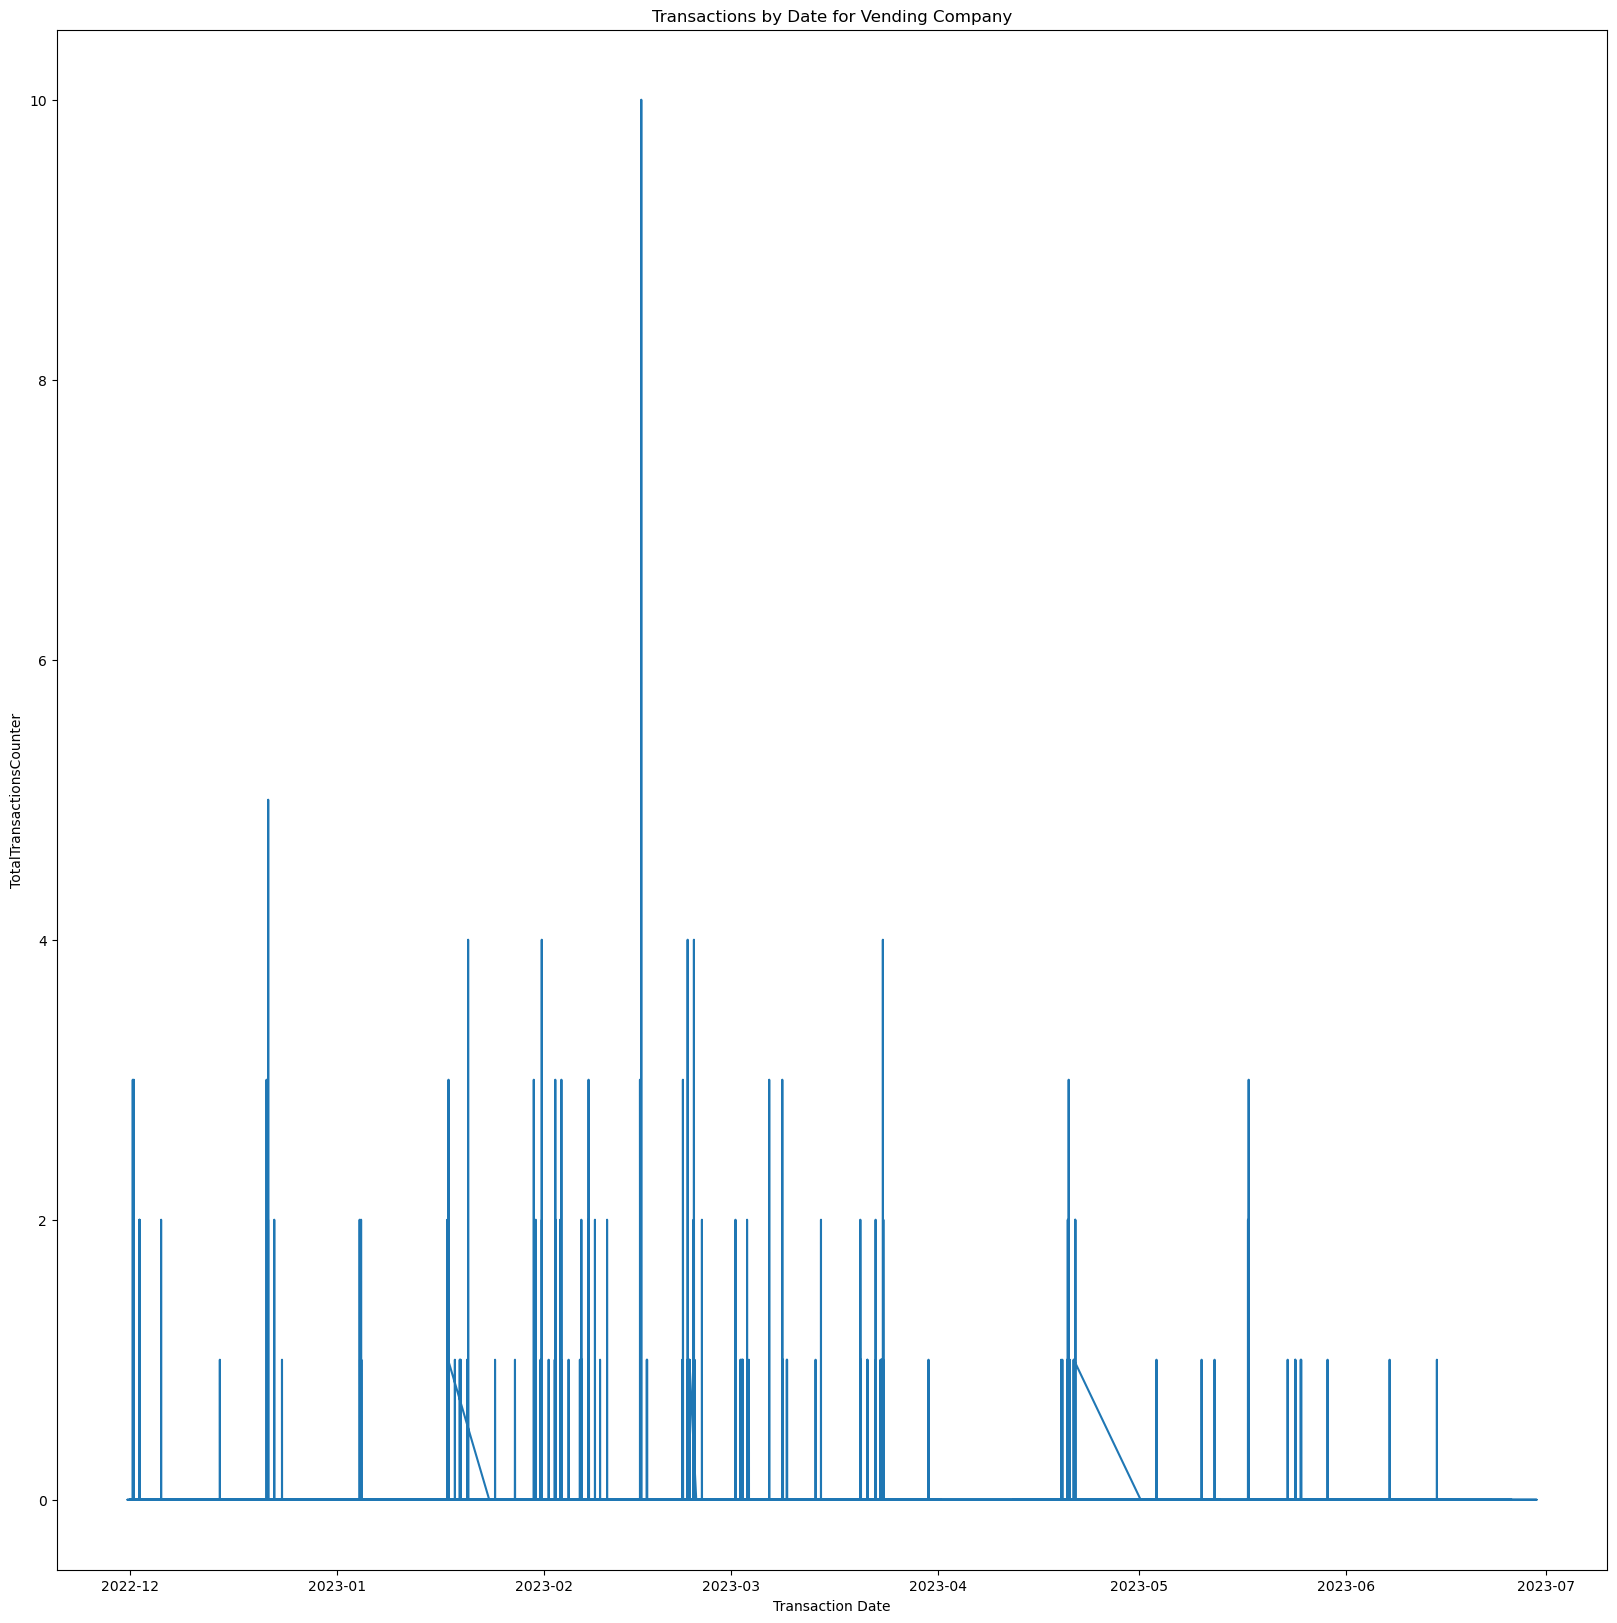

In [ ]:
plt.figure(figsize=(20, 20))
plt.plot(df_coffeeCappTransVend['ReferenceDate'], df_coffeeCappTransVend['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for Vending Company')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

### CoffeeCappTransByPlatformInstantKpis

In [ ]:

query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,1,2022-11-30 13:45:00,1,BiTX-OD,387,327
1,2,2022-11-30 13:45:00,2,MobilePay,684,578
2,3,2022-11-30 13:45:00,3,MobilePayStage,0,0
3,4,2022-11-30 13:45:00,4,MobilePaySpain,0,0
4,5,2022-11-30 13:45:00,5,MobilePayFrance,0,0
...,...,...,...,...,...,...
449938,459932,2023-06-29 14:35:00,4,MobilePaySpain,0,0
449939,459933,2023-06-29 14:35:00,5,MobilePayFrance,0,0
449940,459934,2023-06-29 14:35:00,6,MobilePay-CPI,131,120
449941,459935,2023-06-29 14:35:00,7,Coges,126,113


In [ ]:
query = """
SELECT  [PlatformName]
        ,SUM([TotalTransactionsCounter]) AS TotalTransactionsCounter
        ,SUM([CompletedTransactionsCounter]) AS CompletedTransactionsCounter
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE TotalTransactionsCounter != 0
GROUP BY PlatformName
"""

df_CoffeeCappTransByPlatformGroup = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatformGroup

,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,MobilePayStage,19140,0
1,MobilePay,21660862,16271230
2,MobilePay-CPI,3743823,2948260
3,Pickio,334,184
4,BiTX-OD,10958307,9586548
5,Coges,3597769,2684208


In [ ]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'BiTX-OD'
"""

df_CoffeeCappTransByPlatformBitx = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatformBitx

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,1,2022-11-30 13:45:00,1,BiTX-OD,387,327
1,8,2022-11-30 13:50:00,1,BiTX-OD,416,344
2,15,2022-11-30 13:55:00,1,BiTX-OD,402,346
3,22,2022-11-30 14:00:00,1,BiTX-OD,408,335
4,29,2022-11-30 14:05:00,1,BiTX-OD,455,397
...,...,...,...,...,...,...
60774,459897,2023-06-29 14:15:00,1,BiTX-OD,427,400
60775,459905,2023-06-29 14:20:00,1,BiTX-OD,368,346
60776,459913,2023-06-29 14:25:00,1,BiTX-OD,370,336
60777,459921,2023-06-29 14:30:00,1,BiTX-OD,361,339


Text(0, 0.5, 'TotalTransactionsCounter')

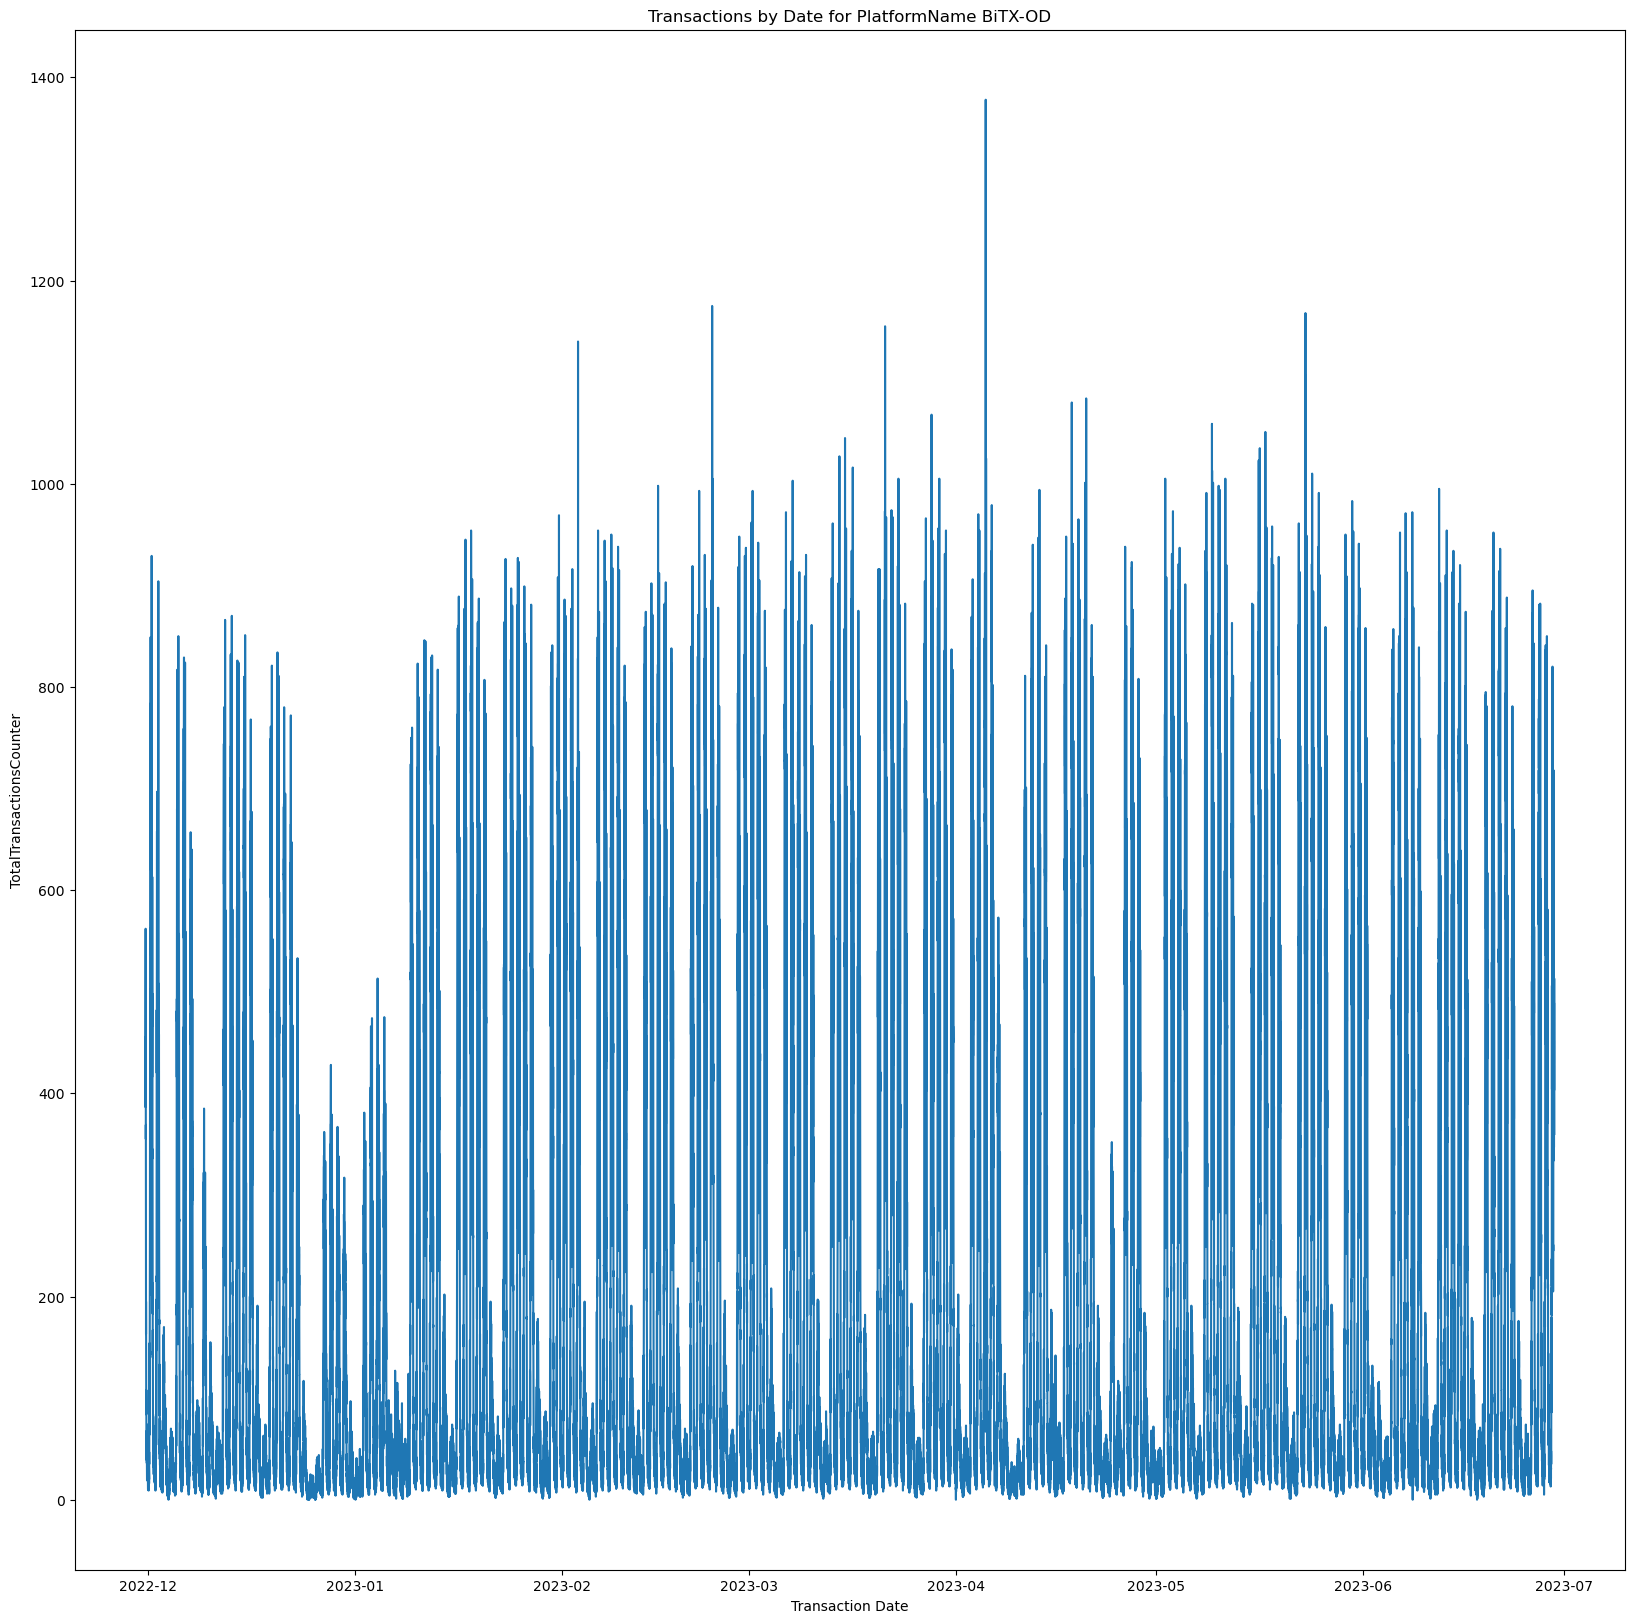

In [ ]:
plt.figure(figsize=(20, 20))

# Plotting the timeseries graph of given dataset
plt.plot(df_CoffeeCappTransByPlatformBitx['ReferenceDate'], df_CoffeeCappTransByPlatformBitx['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for PlatformName BiTX-OD')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

In [ ]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePayStage'
"""

df_CoffeeCappTransByPlatformMobile = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatformMobile

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,3,2022-11-30 13:45:00,3,MobilePayStage,0,0
1,10,2022-11-30 13:50:00,3,MobilePayStage,0,0
2,17,2022-11-30 13:55:00,3,MobilePayStage,0,0
3,24,2022-11-30 14:00:00,3,MobilePayStage,3,0
4,31,2022-11-30 14:05:00,3,MobilePayStage,1,0
...,...,...,...,...,...,...
60774,459899,2023-06-29 14:15:00,3,MobilePayStage,0,0
60775,459907,2023-06-29 14:20:00,3,MobilePayStage,0,0
60776,459915,2023-06-29 14:25:00,3,MobilePayStage,2,0
60777,459923,2023-06-29 14:30:00,3,MobilePayStage,0,0


Text(0, 0.5, 'TotalTransactionsCounter')

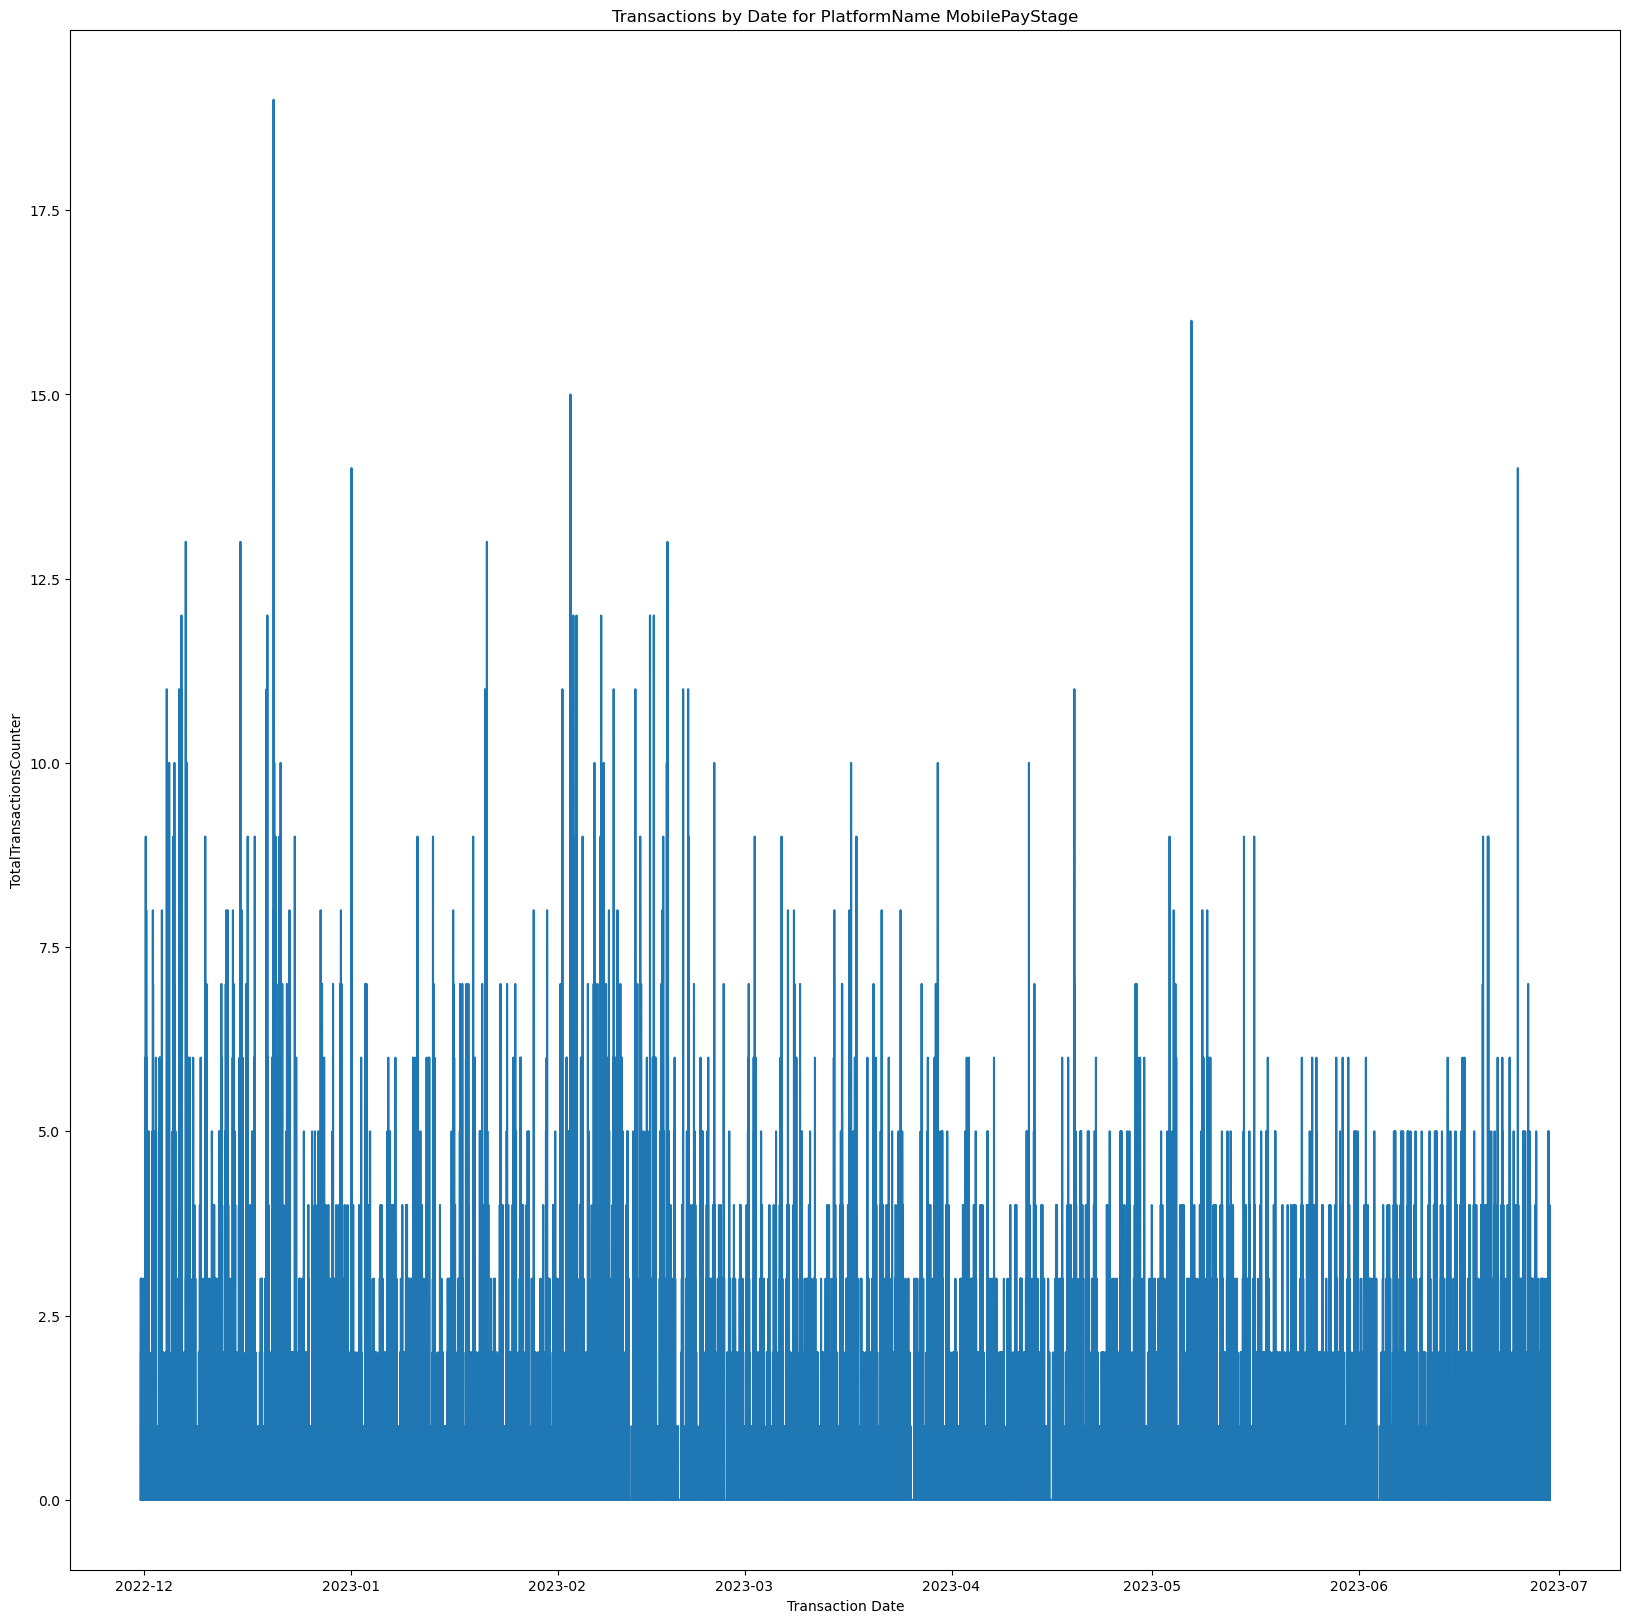

In [ ]:
plt.figure(figsize=(20, 20))

# Plotting the timeseries graph of given dataset
plt.plot(df_CoffeeCappTransByPlatformMobile['ReferenceDate'], df_CoffeeCappTransByPlatformMobile['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for PlatformName MobilePayStage')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

### MpayMerchantsInstantKpis

In [ ]:
query = """
  SELECT *
  FROM [VENPAY-BI].[dbo].[MpayMerchantsInstantKpis] 
"""

df_MpayMerchants = pd.read_sql(query, engine)
df_MpayMerchants


,PK_MpayMerchantsDailyKpiId,EK_MerchantId,Inserted,ReferenceDate,ActiveUsersCounter,ActiveStickersCounter,TotalStickersCounter,TotalTransactionsCounter,WalletsTransactionsCounter,CardsTransactionsCounter,...,WalletsSelectionsCounter,CardsSelectionsCounter,TotalTransactionsValue,WalletsTransactionsValue,CardsTransactionsValues,ExtUserIdTransactionsValue,TotalRechargesValue,CardsRechargesValue,CashRechargesValue,TotalWalletsBalance
0,1,1,2022-12-01 20:19:32.800,2022-12-01 20:10:00,0,0,32,0,0,0,...,0,0,0,0,0,0,45000,45000,0,931408184
1,2,2,2022-12-01 20:19:32.833,2022-12-01 20:10:00,0,0,17,0,0,0,...,0,0,0,0,0,0,45000,45000,0,931408184
2,3,4,2022-12-01 20:19:32.837,2022-12-01 20:10:00,0,0,23,0,0,0,...,0,0,0,0,0,0,45000,45000,0,931408184
3,4,6,2022-12-01 20:19:32.840,2022-12-01 20:10:00,0,0,56,0,0,0,...,0,0,0,0,0,0,45000,45000,0,931408184
4,5,7,2022-12-01 20:19:32.847,2022-12-01 20:10:00,81,88,73635,79,74,5,...,98,5,65480,61080,4400,0,62550,45000,17550,931408184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893935,3893936,106,2023-06-29 14:39:42.230,2023-06-29 14:30:00,0,0,1,0,0,0,...,0,0,0,0,0,0,290000,290000,0,1154743059
3893936,3893937,107,2023-06-29 14:39:42.233,2023-06-29 14:30:00,0,0,1,0,0,0,...,0,0,0,0,0,0,290000,290000,0,1154743059
3893937,3893938,108,2023-06-29 14:39:42.240,2023-06-29 14:30:00,0,0,0,0,0,0,...,0,0,0,0,0,0,290000,290000,0,1154743059
3893938,3893939,109,2023-06-29 14:39:42.240,2023-06-29 14:30:00,0,0,6,0,0,0,...,0,0,0,0,0,0,290000,290000,0,1154743059


In [ ]:
df_MpayMerchants.head()

,PK_MpayMerchantsDailyKpiId,EK_MerchantId,Inserted,ReferenceDate,ActiveUsersCounter,ActiveStickersCounter,TotalStickersCounter,TotalTransactionsCounter,WalletsTransactionsCounter,CardsTransactionsCounter,...,WalletsSelectionsCounter,CardsSelectionsCounter,TotalTransactionsValue,WalletsTransactionsValue,CardsTransactionsValues,ExtUserIdTransactionsValue,TotalRechargesValue,CardsRechargesValue,CashRechargesValue,TotalWalletsBalance
0,1,1,2022-12-01 20:19:32.800,2022-12-01 20:10:00,0,0,32,0,0,0,...,0,0,0,0,0,0,45000,45000,0,931408184
1,2,2,2022-12-01 20:19:32.833,2022-12-01 20:10:00,0,0,17,0,0,0,...,0,0,0,0,0,0,45000,45000,0,931408184
2,3,4,2022-12-01 20:19:32.837,2022-12-01 20:10:00,0,0,23,0,0,0,...,0,0,0,0,0,0,45000,45000,0,931408184
3,4,6,2022-12-01 20:19:32.840,2022-12-01 20:10:00,0,0,56,0,0,0,...,0,0,0,0,0,0,45000,45000,0,931408184
4,5,7,2022-12-01 20:19:32.847,2022-12-01 20:10:00,81,88,73635,79,74,5,...,98,5,65480,61080,4400,0,62550,45000,17550,931408184


In [ ]:
df_MpayMerchants.tail(10)

,PK_MpayMerchantsDailyKpiId,EK_MerchantId,Inserted,ReferenceDate,ActiveUsersCounter,ActiveStickersCounter,TotalStickersCounter,TotalTransactionsCounter,WalletsTransactionsCounter,CardsTransactionsCounter,...,WalletsSelectionsCounter,CardsSelectionsCounter,TotalTransactionsValue,WalletsTransactionsValue,CardsTransactionsValues,ExtUserIdTransactionsValue,TotalRechargesValue,CardsRechargesValue,CashRechargesValue,TotalWalletsBalance
3893930,3893931,101,2023-06-29 14:39:42.210,2023-06-29 14:30:00,0,0,2,0,0,0,...,0,0,0,0,0,0,290000,290000,0,1154743059
3893931,3893932,102,2023-06-29 14:39:42.213,2023-06-29 14:30:00,0,0,3,0,0,0,...,0,0,0,0,0,0,290000,290000,0,1154743059
3893932,3893933,103,2023-06-29 14:39:42.217,2023-06-29 14:30:00,0,0,0,0,0,0,...,0,0,0,0,0,0,290000,290000,0,1154743059
3893933,3893934,104,2023-06-29 14:39:42.220,2023-06-29 14:30:00,0,0,0,0,0,0,...,0,0,0,0,0,0,290000,290000,0,1154743059
3893934,3893935,105,2023-06-29 14:39:42.227,2023-06-29 14:30:00,0,0,0,0,0,0,...,0,0,0,0,0,0,290000,290000,0,1154743059
3893935,3893936,106,2023-06-29 14:39:42.230,2023-06-29 14:30:00,0,0,1,0,0,0,...,0,0,0,0,0,0,290000,290000,0,1154743059
3893936,3893937,107,2023-06-29 14:39:42.233,2023-06-29 14:30:00,0,0,1,0,0,0,...,0,0,0,0,0,0,290000,290000,0,1154743059
3893937,3893938,108,2023-06-29 14:39:42.240,2023-06-29 14:30:00,0,0,0,0,0,0,...,0,0,0,0,0,0,290000,290000,0,1154743059
3893938,3893939,109,2023-06-29 14:39:42.240,2023-06-29 14:30:00,0,0,6,0,0,0,...,0,0,0,0,0,0,290000,290000,0,1154743059
3893939,3893940,110,2023-06-29 14:39:42.247,2023-06-29 14:30:00,0,0,0,0,0,0,...,0,0,0,0,0,0,290000,290000,0,1154743059
